# Lesson 5 Assignment - Targeted Marketing Campaign

## Author - Connor Higgins

In this problem we will use historical data from past customer responses to build a classification model.

We will apply the trained model to a new set of prospects to whom we may want extend an offer for a [Personal Equity Plan](https://www.investopedia.com/terms/p/pep.asp). Rather than doing a mass marketing campaign to all new prospects, we would like to target those that are likely to respond positively to our offer (according to our classification model).

In [1]:
# Data Source
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Bank%20Data.csv"

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
np.random.seed(42)

In [3]:
# Loading in dataframe of URL
df = pd.read_csv(URL)
print('BankData.csv')
print(df.info())
df.head()

BankData.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null int64
sex            600 non-null object
region         600 non-null object
income         600 non-null float64
married        600 non-null object
children       600 non-null int64
car            600 non-null object
save_act       600 non-null object
current_act    600 non-null object
mortgage       600 non-null object
pep            600 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 51.6+ KB
None


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


### Initial Data Exploration
#### Numeric Features

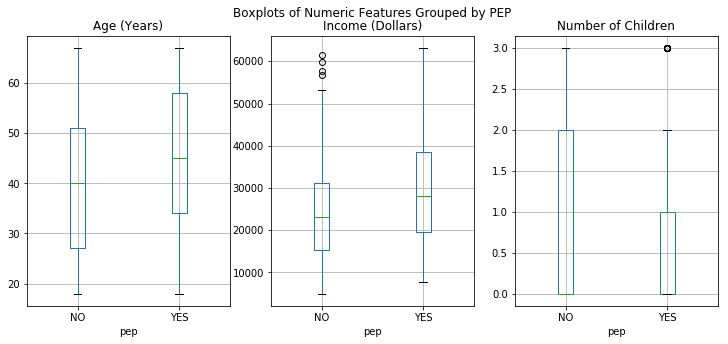

,age,income,children
p-val,0.00001856,0.00000004,0.15834003
t-stat,4.3164,5.5675,-1.4124


In [4]:
# Plotting Numerical Variables
plt.figure(figsize=(12,5))
ax1 = plt.subplot(131)
df.boxplot(column='age', by='pep', ax=ax1)
ax1.set_title('Age (Years)')
ax2 = plt.subplot(132)
df.boxplot(column='income', by='pep', ax=ax2)
ax2.set_title('Income (Dollars)')
ax3 = plt.subplot(133)
df.boxplot(column='children', by='pep', ax=ax3)
ax3.set_title('Number of Children')
plt.suptitle('Boxplots of Numeric Features Grouped by PEP')
plt.show()

# Conducting Hypothesis Test: t-test
PEP_No = df[df['pep'] == 'YES']
PEP_Yes = df[df['pep'] == 'NO']

ttst_res = {}
for col in ['age', 'income', 'children']:
    t, p = ss.ttest_ind(PEP_No[col], PEP_Yes[col])
    ttst_res.update({col : {'t-stat': f'{t:0.4f}', 'p-val': f'{p:0.8f}'}}) 
ttst_df = pd.DataFrame(data=ttst_res)
ttst_df

#### Figure 1 | Boxplots of Numeric Features Grouped by PEP
BankData.csv consists of 3 numeric features: age (in years), income (in dollars), and (number of) children. Grouping feature values by the target variable PEP allows us to see any difference in the distributions of those with a Personal Equity Plan (YES) and those without one (NO). Overall, it appears that those with a PEP tend to be slightly older with more income. Conducting a t-test between groups shows that the differences in age and income between pep and non-pep customers are signficiant (p > 0.001 in both cases). No siginificant differences were found between groups with regards to number of children.

#### Categorical Features

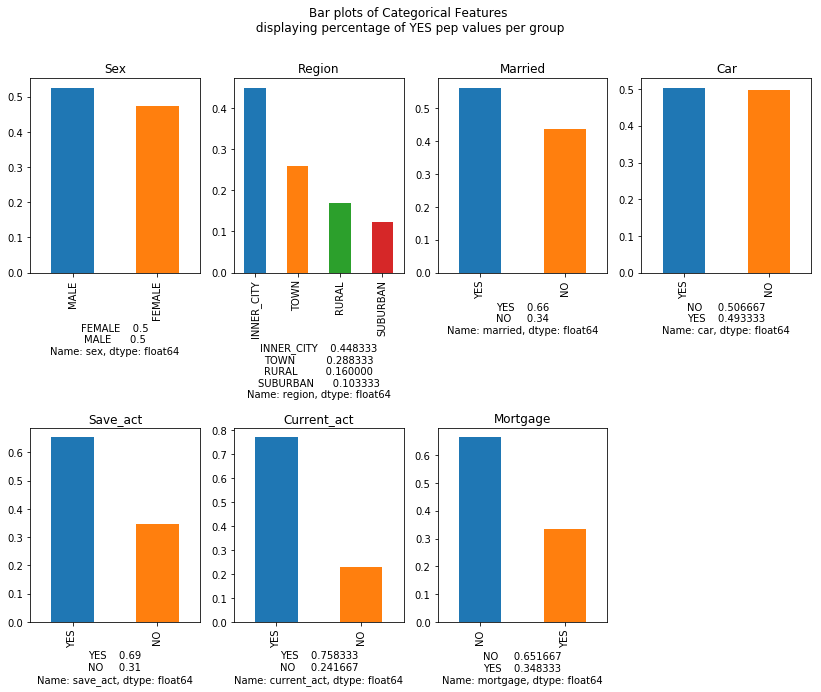

,sex,region,married,car,save_act,current_act,mortgage
Chi-squared stat,1.3166,3.7906,21.5638,0.2147,3.1781,0.3792,0.3508
degrees of freedom,2,4,2,2,2,2,2
p-val,0.51774226,0.43509003,0.00002077,0.89820293,0.20411891,0.82727193,0.83910060


In [5]:
# Plotting Categorical Variables
cols = list(df.columns)
catcols = [col for col in cols if col not in ('age', 'income', 'children', 'pep')]
subplotvals = [val for val in range(241, 248)]

plt.figure(figsize=(14,10))
for i in range(len(catcols)):
    ax = plt.subplot(subplotvals[i])
    col = catcols[i]
    df.groupby('pep')[col].value_counts(normalize=True)['YES'].plot(kind='bar', ax=ax, title=col.capitalize())
    ax.set_xlabel(df[col].value_counts(normalize=True))
plt.subplots_adjust(hspace=0.8)
plt.suptitle('Bar plots of Categorical Features\n displaying percentage of YES pep values per group')
plt.show()

# Conducting Hypothesis Test: chi-squared
chitst_res = {}
for col in catcols:
    chisqr = pd.crosstab(index=df[col], columns=df['pep'], margins=True)
    f_obs = np.array([chisqr.NO.values, chisqr.YES.values])
    chires = ss.chi2_contingency(f_obs)[0:3]
    chitst_res.update({col : {'Chi-squared stat': f'{chires[0]:0.4f}',
                              'p-val': f'{chires[1]:0.8f}',
                              'degrees of freedom' : f'{chires[2]}'}})
chitst_df = pd.DataFrame(data=chitst_res)
chitst_df

#### Figure 2 | Boxplots of Numeric Features Grouped by PEP
BankData.csv consists of 3 categorical features: gender (sex), home location with respect to level of development (region), is married (married), has a car (car), has a savings acount (save_act), currently has an account (current_act), and has a mortgage (mortgage). All features are binary (YES, NO) except for region which has 4 categories (Inner City, Town, Rural, and Suburban). 

Grouping feature values by the target variable pep and plotting all pep YES percentages per value allows us to compare the YES percentages to the population (df) percentages (listed below each of the plots above). When compared with the dataset population, the yes pep group has a greater percentage of MALE values for the sex feature (51% v. 50%), SUBURBAN values for the region feature (12% v. 10%), NO values for the married feature (42% v. 34%), NO values for the save_act feature (33% v. 31%), YES values for the current_act feature (76% v. 78%), and YES values for the mortgage feature (67% v. 65%). A Chi-Squared Test, conducted for each categorical feature, determined that only the married feature had value frequencies that significantly differed from those of the dataset population (p < 0.001).

### Data Preparation

In [6]:
# Dummy encoding categorical variables, dropping first value of each category
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,income,children,sex_MALE,region_RURAL,region_SUBURBAN,region_TOWN,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES
0,48,17546.0,1,0,0,0,0,0,0,0,0,0,1
1,40,30085.1,3,1,0,0,1,1,1,0,1,1,0
2,51,16575.4,0,0,0,0,0,1,1,1,1,0,0
3,23,20375.4,3,0,0,0,1,1,0,0,1,0,0
4,57,50576.3,0,0,1,0,0,1,0,1,0,0,0


In [7]:
# Creating feature and target matrices
X = df.drop('pep_YES', axis=1).values
y = df['pep_YES'].values
print(f'X shape: {X.shape} | y shape: {y.shape}')
print(f'\nX\n{X}')
print(f'\ny[:20]\n{y[:20]}')

X shape: (600, 12) | y shape: (600,)

X
[[4.80000e+01 1.75460e+04 1.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [4.00000e+01 3.00851e+04 3.00000e+00 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [5.10000e+01 1.65754e+04 0.00000e+00 ... 1.00000e+00 1.00000e+00
  0.00000e+00]
 ...
 [3.10000e+01 1.59763e+04 0.00000e+00 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [2.90000e+01 1.47118e+04 0.00000e+00 ... 1.00000e+00 0.00000e+00
  1.00000e+00]
 [3.80000e+01 2.66716e+04 0.00000e+00 ... 0.00000e+00 1.00000e+00
  1.00000e+00]]

y[:20]
[1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0]


In [8]:
# Splitting the data into training (80%) and testing (20%) portions
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape} | y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape} | y_test shape: {y_test.shape}")

X_train shape: (480, 12) | y_train shape: (480,)
X_test shape: (120, 12) | y_test shape: (120,)


### Classification Model: Decision Tree

In [9]:
# Initializing DecisionTreeClassifier, creating parameter grid of potential hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {"criterion": ['gini', 'entropy'],
                 "splitter": ['best', 'random'],
                 "max_depth": [None if i == 11 else i for i in range(1, 12)],
                 "min_samples_leaf": [1, 3, 5],
                 "min_samples_split": [2, 4, 6],
                 "max_features": [i for i in range(1, 11)]}

# Using GridSearchCV with 5-fold CV to determine best dt model within dt_param_grid 
from sklearn.model_selection import GridSearchCV
dt_gridsrch_cv = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid,
                              cv=5, verbose=2, n_jobs=-1)
dt_gridsrch_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3960 candidates, totalling 19800 fits


[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 6883 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 19063 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 19800 out of 19800 | elapsed:   29.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 4, 6], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [10]:
# Obtaining best decision tree hyperparameters according to grid search
dt_params = dt_gridsrch_cv.best_params_
dt_params

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

Decision Tree Model Accuracy: 90.0%


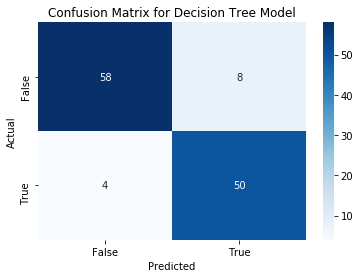

,precision,recall,F1_score,support
Classes,,,,
False,0.935484,0.878788,0.90625,66
True,0.862069,0.925926,0.892857,54
__avg / total__,0.902447,0.9,0.900223,120


In [11]:
# Creating Decision Tree Classifier from dt_params
dt_model = DecisionTreeClassifier(criterion = dt_params['criterion'],
                                  splitter = dt_params['splitter'],
                                  max_depth = dt_params['max_depth'],
                                  min_samples_split = dt_params['min_samples_split'],
                                  min_samples_leaf = dt_params['min_samples_leaf'],
                                  max_features = dt_params['max_features'],
                                  random_state = 42).fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)

# Creating confusion matrix and accompanying report alongside acc_score
from pandas_ml import ConfusionMatrix
conf_mat_dt = ConfusionMatrix(y_test, y_dt_pred)
conf_mat_dt.plot(backend='seaborn', annot=True, cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Model')
print(f'Decision Tree Model Accuracy: {conf_mat_dt.ACC * 100.0}%')
plt.show()
conf_mat_dt.classification_report

#### Figure 3 | Classification Matrix and Report for Decision Tree Model
The best decision tree model acheived an accuracy score of 90%. As our goal is to target as many potential pep customers, it would likely make sense to use recall as the scoring metric for later models. This would favor models which increase the number of true positives while reducing the number of false negatives. Here, the recall for the positive class was 92.59% with just 4 entries considered to be false negatives. 

Decision Tree with Best Hyperparameters


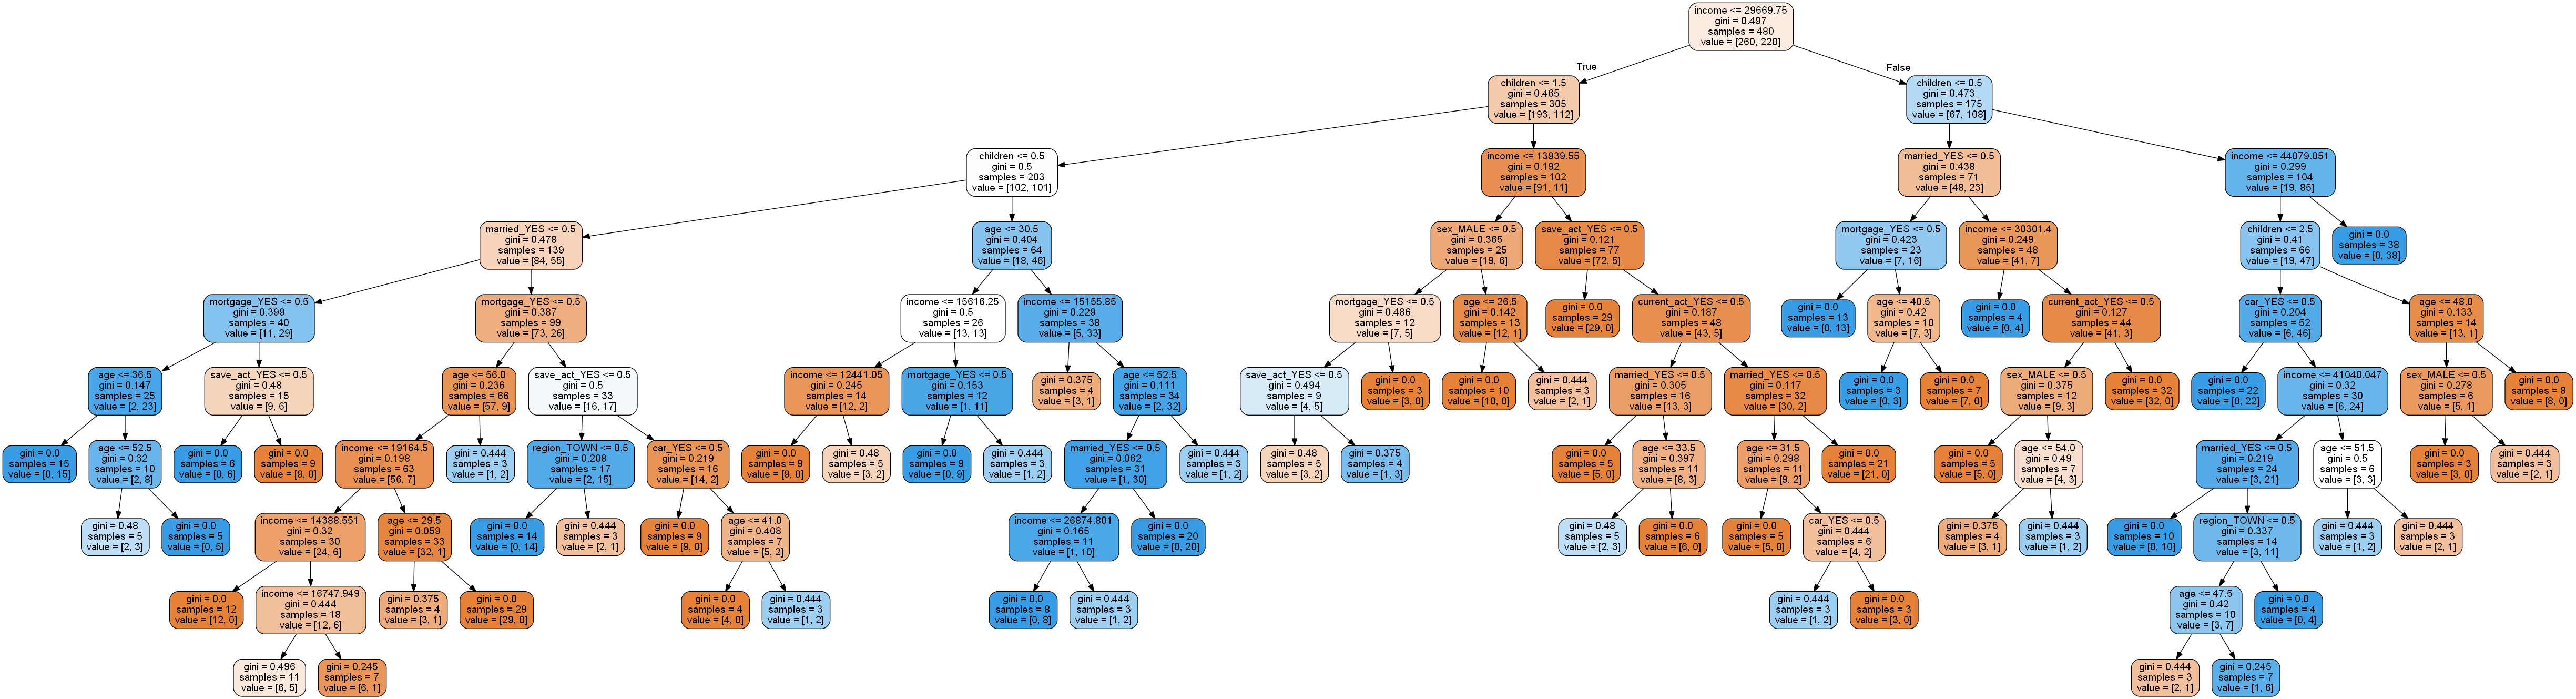

In [12]:
# Displaying structure of best decision tree model
def display_decision_tree(model, file_name, model_name, feature_names):
    '''
    Displays .png conversion of .dot file of export_graphiz visualization of a given tree
    '''
    import os
    from sklearn import tree
    from IPython.display import Image
    dotfile = open(f"{file_name}.dot", 'w')
    tree.export_graphviz(model, out_file=dotfile, filled=True,
                         rounded=True, feature_names=feature_names)
    dotfile.close()
    os.system(f"dot -Tpng {file_name}.dot -o {file_name}.png")
    print(model_name)
    return Image(filename=f'{file_name}.png', width=2000, height=2000)

feature_names = list(df.columns)
feature_names.remove('pep_YES')

display_decision_tree(dt_model, 'dt_final_L05',
                      'Decision Tree with Best Hyperparameters', feature_names)

#### Figure 4 | Structure of Decision Tree Model
Visualization of the best decision tree model. The first split occurred using income, followed by number of children for the second split, followed by married_YES, income, and number of children for the third split. During the initial data exploration, married, income, and age features were shown to be significant predictors of the pep target, so it's no surprise to see their use by the model within the first set of decisions. The children feature, however, was not shown to be significant, meaning that its contribution to the model is likely in conjunction with another feature. 

### Classification Model: Random Forest

In [13]:
# Initializing RandomForestClassfier, creating parameter grid of potential hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

rf_param_grid = {'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False],
                 'max_depth': [None if i == 110 else i for i in range(10, 111, 10)],
                 'max_features': [i for i in range(1,11)],
                 'min_samples_leaf': [i for i in range(1, 11)],
                 'min_samples_split': [i for i in range(2, 11)],
                 'n_estimators': [i for i in range(200, 2001, 200)]}

# Using RandomizedSearchCV with 3-fold CV to determine best dt model within dt_param_grid
from sklearn.model_selection import RandomizedSearchCV
rf_random_cv = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, n_iter=200,
                                  cv=3, verbose=2, n_jobs=-1, random_state=42)
rf_random_cv.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  9.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_tr

In [14]:
# Obtaining best random forest hyperparameters according to randomized search
rf_params = rf_random_cv.best_params_
rf_params

{'n_estimators': 800,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 9,
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': True}

Decision Tree Model Accuracy: 90.0%
Random Forest Model Accuracy: 92.5%


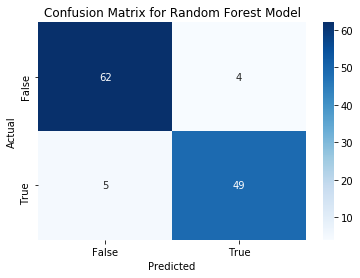

,precision,recall,F1_score,support
Classes,,,,
False,0.925373,0.939394,0.932331,66
True,0.924528,0.907407,0.915888,54
__avg / total__,0.924993,0.925,0.924931,120


In [15]:
# Creating Random Forest Classifier from rf_params
rf_model = RandomForestClassifier(bootstrap=rf_params['bootstrap'],
                                  criterion=rf_params['criterion'],
                                  max_depth=rf_params['max_depth'],
                                  max_features=rf_params['max_features'],
                                  min_samples_leaf=rf_params['min_samples_leaf'],
                                  min_samples_split=rf_params['min_samples_split'],
                                  n_estimators=rf_params['n_estimators'], random_state=42).fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Creating confusion matrix and accompanying report alongside acc_score
conf_mat_rf = ConfusionMatrix(y_test, y_rf_pred)
conf_mat_rf.plot(backend='seaborn', annot=True, cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
print(f'Decision Tree Model Accuracy: {conf_mat_dt.ACC * 100.0}%')
print(f'Random Forest Model Accuracy: {conf_mat_rf.ACC * 100.0}%')
plt.show()
conf_mat_rf.classification_report

#### Figure 5 | Classification Matrix and Report for Random Forest Model

The best random forest model achieved an accuracy score of 92.5%, outperforming the original decision tree model by 2.5%. However, with respect to recall, the random forest model actually performed worse, correctly identifying just 49 of 54 (90.7%) customers with a pep plan. In contrast, the decision tree model correctly identified 50 out of 54 customers (92.5%). The overall greater accruacy of the random forest model can be solely explained by an increase in the number of true negatives. Given the nature of this machine learning scenario, we likely care less about not targeting the wrong individuals than correctly identifying and targeting all the right individuals. Therefore, the decision tree model would likely be used in lieu of the random forest model. The fact that a single decision tree largely outperformed a random forest suggests that it is quite stable, with any remaining errors the result of not having enough data for certain types of customers.